[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


/tmp/ipykernel_4320/3281116716.py:84: RuntimeWarning: divide by zero encountered in scalar divide
  if np.abs((cost_i[i]-cost_i[i-1])/cost_i[i])<0.05:


[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.   0.   0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.   0.   0.01 0.01 0.   0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.   0.   0.01 0.01 0.   0.01 0.01 0.01 0.   0.01 0.01 0.01 0.01 0.
 0.01 0.01 0.01 0.01 0.01 0.   0.01 0.01 0.01 0.01 0.01 0.01 0.  ]
[0.   0.   0.   0.01 0.   0.01 0.01 

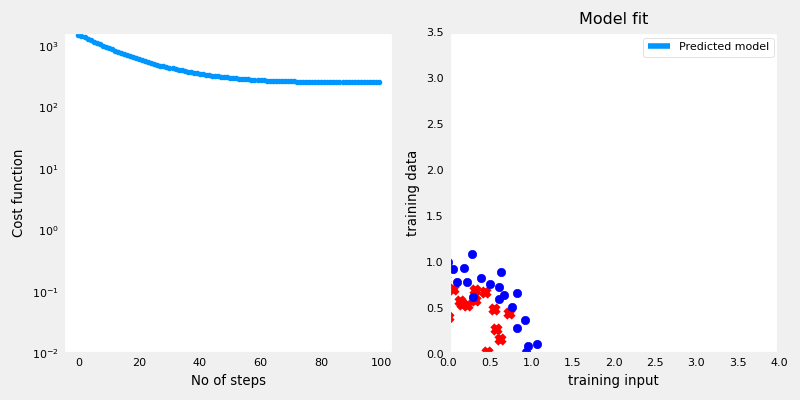

In [1]:
import numpy as np,sys
import matplotlib.pyplot as plt
from matplotlib import cm
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2],[0.5,0.5],[2.7,1.5], [1, 2.5]])
y_train = np.array([1,  1, 1, 1, 1,0,1, 1],dtype=np.longdouble)

niter=10000
Win=np.array([5.,3.])
Bin=1.



#wx,by=np.meshgrid(np.linspace(-6,12,100),np.linspace(10,-20,100))

def model(x,theta):
    w,b=theta
    if np.isscalar(x):
        x=np.array(x)
    if np.isscalar(w):
        w=np.array([w])
    elif isinstance(w,tuple):
        w=np.array(w)
    sigmoid=np.zeros(len(x))
    for i in range(len(x)):
        if w.shape!=x[i].shape:
            print("Shape of W and X dosn't match", w.shape,x[i].shape)
            sys.exit()            
        sigmoid[i]=1/(1+np.exp(-(np.dot(w,x[i])+b)))
    return sigmoid

def dmodel_w(x,theta):
    w,b=theta
    return x

def dmodel_b(x,theta): 
    w,b=theta
    return 1.

def cost(x,theta,y):
    w,b=theta
    cf=  -y*np.log(model(x,theta))-(1-y)*np.log(1-model(x,theta))
    return np.sum(cf)/np.shape(x)[0]

def dcost_w(x,theta,y):
    w,b=theta
    if np.isscalar(w):
        w=np.array([w])
    elif isinstance(w,tuple):
        w=np.array(w)
    dcost_w_result=np.zeros(w.shape) 
    for wi in range(len(w)):
        dcost_w_result[wi]=np.sum((model(x,theta)-y)*dmodel_w(x,theta)[:,wi])/len(x) 
    return  dcost_w_result 

def dcost_b(x,theta,y):
    return np.sum((model(x,theta)-y)*dmodel_b(x,theta))/len(x)
    
def compute_gradient(x,theta,y):
    return dcost_w(x,theta,y),dcost_b(x,theta,y)

np.set_printoptions(precision=2)

def gradient_decent(x,y,theta,alpha,niter):
    w,b=theta
    if np.isscalar(w):
        w=np.array(w)
    elif isinstance(w, tuple):
        w=np.array(w)

    if theta[1]>0:  #constraining parameters
        b=-theta[1]
    cost_i=np.zeros(niter)
    for i in np.arange(niter):
        if i>1:
            if np.abs((cost_i[i]-cost_i[i-1])/cost_i[i])<0.05:
                alpha/=2
        dcw,dcb= compute_gradient(x,theta,y)
        
        w = w-alpha*dcw
        b = b-alpha*dcb
        theta=w,b
        cost_i[i]=cost(x,theta,y)
        if i>1:
            if cost_i[i]>cost_i[i-1]:
                alpha/=2
        #print(cost_i[i],alpha)
        #print(theta)    
    return cost_i,theta

 
    

alpha=0.5
theta_in=Win,Bin
grad_dec_result,theta_f=gradient_decent(x_train,y_train,theta_in,alpha,niter)    

wf,bf=theta_f
print(wf,bf,grad_dec_result[-1])



plt.figure(figsize=(8,4))
ax=plt.subplot(121)
plt.plot(np.arange(niter),grad_dec_result,".")
plt.yscale("log")
plt.xlabel("No of steps")
plt.ylabel("Cost function")
plt.ylim(bottom=0.01)


ax=plt.subplot(1,2,2)    
#plt.plot(x_train, model(x_train,theta_f), c = "g",label="Predcited model")
ax.plot((-bf/wf[0],0),(0,-bf/wf[1]),label="Predicted model")
pos=y_train>0.5
neg=y_train<0.5
plt.scatter(x_train[:,0][pos],x_train[:,1][pos] , marker='x', c='r') 
plt.scatter(x_train[:,0][neg],x_train[:,1][neg] , marker='o', c='b') 
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
# Set the title
plt.title("Model fit")
# Set the y-axis label
plt.ylabel('training data')
# Set the x-axis label
plt.xlabel('training input')    
plt.legend()
plt.tight_layout()


x_train, model(x_train,theta_f),y_train



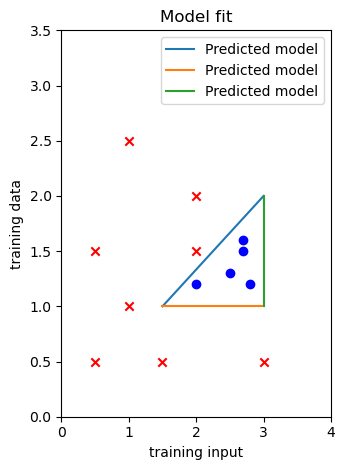

In [20]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2],[0.5,0.5],[2.7,1.5], [1, 2.5],[2.7,1.6],[2.8,1.2],[2,1.2],[2.5,1.3],[2,1.5]])
y_train = np.array([1,  1, 1, 1, 1,1,0, 1,0,0,0,0,1],dtype=np.longdouble)

ax=plt.subplot(1,2,2)    
#plt.plot(x_train, model(x_train,theta_f), c = "g",label="Predcited model")
ax.plot((3,1.5),(2,1),label="Predicted model")
ax.plot((3,1.5),(1,1),label="Predicted model")
ax.plot((3,3),(2,1),label="Predicted model")
pos=y_train>0.5
neg=y_train<0.5
plt.scatter(x_train[:,0][pos],x_train[:,1][pos] , marker='x', c='r') 
plt.scatter(x_train[:,0][neg],x_train[:,1][neg] , marker='o', c='b') 
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
# Set the title
plt.title("Model fit")
# Set the y-axis label
plt.ylabel('training data')
# Set the x-axis label
plt.xlabel('training input')    
plt.legend()
plt.tight_layout()




In [23]:
import numpy as np,sys
import matplotlib.pyplot as plt
from matplotlib import cm

niter=10000
Win=np.array([5.,3.,5.])
Bin=1.



#wx,by=np.meshgrid(np.linspace(-6,12,100),np.linspace(10,-20,100))

def model(x,theta):
    w,b=theta
    if np.isscalar(x):
        x=np.array(x)
    if np.isscalar(w):
        w=np.array([w])
    elif isinstance(w,tuple):
        w=np.array(w)
    sigmoid=np.zeros(len(x))
    for i in range(len(x)):
        #if w.shape!=x[i].shape:
        #    print("Shape of W and X dosn't match", w.shape,x[i].shape)
        #    sys.exit()            
        sigmoid[i]=1/(1+np.exp(-(np.dot(w,x[i])+b)))
    return sigmoid

def dmodel_w(x,theta):
    w,b=theta
    return x

def dmodel_b(x,theta): 
    w,b=theta
    return 1.

def cost(x,theta,y):
    w,b=theta
    cf=  -y*np.log(model(x,theta))-(1-y)*np.log(1-model(x,theta))
    return np.sum(cf)/np.shape(x)[0]

def dcost_w(x,theta,y):
    w,b=theta
    if np.isscalar(w):
        w=np.array([w])
    elif isinstance(w,tuple):
        w=np.array(w)
    dcost_w_result=np.zeros(w.shape) 
    for wi in range(len(w)):
        dcost_w_result[wi]=np.sum((model(x,theta)-y)*dmodel_w(x,theta)[:,wi])/len(x) 
    return  dcost_w_result 

def dcost_b(x,theta,y):
    return np.sum((model(x,theta)-y)*dmodel_b(x,theta))/len(x)
    
def compute_gradient(x,theta,y):
    return dcost_w(x,theta,y),dcost_b(x,theta,y)

np.set_printoptions(precision=2)

def gradient_decent(x,y,theta,alpha,niter):
    w,b=theta
    if np.isscalar(w):
        w=np.array(w)
    elif isinstance(w, tuple):
        w=np.array(w)

    if theta[1]>0:  #constraining parameters
        b=-theta[1]
    cost_i=np.zeros(niter)
    for i in np.arange(niter):
        if i>1:
            if np.abs((cost_i[i]-cost_i[i-1])/cost_i[i])<0.05:
                alpha/=2
        dcw,dcb= compute_gradient(x,theta,y)
        
        w = w-alpha*dcw
        b = b-alpha*dcb
        theta=w,b
        cost_i[i]=cost(x,theta,y)
        if i>1:
            if cost_i[i]>cost_i[i-1]:
                alpha/=2
        #print(cost_i[i],alpha)
        #print(theta)    
    return cost_i,theta

 
    

alpha=0.5
theta_in=Win,Bin
grad_dec_result,theta_f=gradient_decent(x_train,y_train,theta_in,alpha,niter)    

wf,bf=theta_f
print(wf,bf,grad_dec_result[-1])



plt.figure(figsize=(8,4))
ax=plt.subplot(121)
plt.plot(np.arange(niter),grad_dec_result,".")
plt.yscale("log")
plt.xlabel("No of steps")
plt.ylabel("Cost function")
plt.ylim(bottom=0.01)


ax=plt.subplot(1,2,2)    
#plt.plot(x_train, model(x_train,theta_f), c = "g",label="Predcited model")
ax.plot((-bf/wf[0],0),(0,-bf/wf[1]),label="Predicted model")
pos=y_train>0.5
neg=y_train<0.5
plt.scatter(x_train[:,0][pos],x_train[:,1][pos] , marker='x', c='r') 
plt.scatter(x_train[:,0][neg],x_train[:,1][neg] , marker='o', c='b') 
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
# Set the title
plt.title("Model fit")
# Set the y-axis label
plt.ylabel('training data')
# Set the x-axis label
plt.xlabel('training input')    
plt.legend()
plt.tight_layout()


x_train, model(x_train,theta_f),y_train



ValueError: shapes (3,) and (2,) not aligned: 3 (dim 0) != 2 (dim 0)

In [13]:
# load dataset
%matplotlib widget
import matplotlib.pyplot as plt
import sys
sys.path.append("week3/OptionalLabs")
sys.path.append("week3/C1W3A1")
from utils import *
plt.style.use('week3/OptionalLabs/deeplearning.mplstyle')
from plt_overfit import overfit_example, output
import numpy as np
from matplotlib import cm
X_train, y_train = load_data("week3/C1W3A1/data/ex2data2.txt")
x_train= map_feature(X_train[:, 0], X_train[:, 1])


def model(x,theta):
    w,b=theta
    x=np.atleast_1d(x)
    w=np.atleast_1d(w)
    sigmoid=np.zeros(len(x))
    for i in range(len(x)):
        if w.shape!=x[i].shape:
            print("Shape of W and X dosn't match", w.shape,x[i].shape)
            sys.exit()            
        sigmoid[i]=1/(1+np.exp(-(np.dot(w,x[i])+b)))
    return sigmoid

def dmodel_w(x,theta):
    w,b=theta
    return x

def dmodel_w_reg(x,theta,lam):
    w,b=theta
    return w

def dmodel_b(x,theta): 
    w,b=theta
    return 1.

def cost(x,theta,y):
    w,b=theta
    cf=  -y*np.log(model(x,theta))-(1-y)*np.log(1-model(x,theta))
    return np.sum(cf)/np.shape(x)[0]
def cost_reg(x,theta,y,lam):
    w,b=theta
    return lam/2*np.shape(x)[0]*(np.sum(w**2))


def dcost_w(x,theta,y):
    w,b=theta
    if np.isscalar(w):
        w=np.array([w])
    elif isinstance(w,tuple):
        w=np.array(w)
    dcost_w_result=np.zeros(w.shape) 
    for wi in range(len(w)):
        dcost_w_result[wi]=np.sum((model(x,theta)-y)*dmodel_w(x,theta)[:,wi])/len(x) 
    return  dcost_w_result 

def dcost_w_reg(x,theta,y,lam):
    w,b=theta
    w=np.atleast_1d(w)
    return (lam/np.shape(x)[0])*w  

def dcost_b(x,theta,y):
    return np.sum((model(x,theta)-y)*dmodel_b(x,theta))/len(x)
    
def compute_gradient(x,theta,y):
    return dcost_w(x,theta,y),dcost_b(x,theta,y)

def compute_gradient_reg(x,theta,y,lam):
    return dcost_w_reg(x,theta,y,lam)

np.set_printoptions(precision=2)

def gradient_decent(x,y,theta,alpha,lam,niter):
    w,b=theta
    w=np.atleast_1d(w)
    #if theta[1]>0:  #constraining parameters
    #    b=-theta[1]
    cost_i=np.zeros(niter)
    for i in np.arange(niter):
        if i>1:
            if np.abs((cost_i[i]-cost_i[i-1])/cost_i[i])<0.05:
                alpha/=2
        dcw,dcb= compute_gradient(x,theta,y)
        dcw_reg= compute_gradient_reg(x,theta,y,lam)
        #print(dcw_reg)
        
        w = w-alpha*(dcw+dcw_reg)
        b = b-alpha*dcb
        theta=w,b
        cost_i[i]=cost(x,theta,y)+cost_reg(x,theta,y,lam)
        if i>1:
            if cost_i[i]>cost_i[i-1]:
                alpha/=2
        print("The cost is",cost_i[i])
        #print(theta)    
    return cost_i,theta

 
    
niter=100
Win=np.ones(x_train.shape[-1])
Bin=1.
lam_in=1.
alpha=0.5
theta_in=Win,Bin
grad_dec_result,theta_f=gradient_decent(x_train,y_train,theta_in,alpha,lam_in,niter)    

wf,bf=theta_f
print(wf,bf,grad_dec_result[-1])



plt.figure(figsize=(8,4))
ax=plt.subplot(121)
plt.plot(np.arange(niter),grad_dec_result,".")
plt.yscale("log")
plt.xlabel("No of steps")
plt.ylabel("Cost function")
plt.ylim(bottom=0.01)


ax=plt.subplot(1,2,2)    
#plt.plot(x_train, model(x_train,theta_f), c = "g",label="Predcited model")
ax.plot((-bf/wf[0],0),(0,-bf/wf[1]),label="Predicted model")
pos=y_train>0.5
neg=y_train<0.5
plt.scatter(x_train[:,0][pos],x_train[:,1][pos] , marker='x', c='r') 
plt.scatter(x_train[:,0][neg],x_train[:,1][neg] , marker='o', c='b') 
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
# Set the title
plt.title("Model fit")
# Set the y-axis label
plt.ylabel('training data')
# Set the x-axis label
plt.xlabel('training input')    
plt.legend()
plt.tight_layout()


print(x_train, model(x_train,theta_f)# load dataset
%matplotlib widget
import matplotlib.pyplot as plt
import sys
sys.path.append("week3/OptionalLabs")
sys.path.append("week3/C1W3A1")
from utils import *
plt.style.use('week3/OptionalLabs/deeplearning.mplstyle')
from plt_overfit import overfit_example, output
import numpy as np
from matplotlib import cm
X_train, y_train = load_data("week3/C1W3A1/data/ex2data2.txt")
x_train= map_feature(X_train[:, 0], X_train[:, 1])


def model(x,theta):
    w,b=theta
    x=np.atleast_1d(x)
    w=np.atleast_1d(w)
    sigmoid=np.zeros(len(x))
    for i in range(len(x)):
        if w.shape!=x[i].shape:
            print("Shape of W and X dosn't match", w.shape,x[i].shape)
            sys.exit()            
        sigmoid[i]=1/(1+np.exp(-(np.dot(w,x[i])+b)))
    return sigmoid

def dmodel_w(x,theta):
    w,b=theta
    return x

def dmodel_w_reg(x,theta,lam):
    w,b=theta
    return w

def dmodel_b(x,theta): 
    w,b=theta
    return 1.

def cost(x,theta,y):
    w,b=theta
    cf=  -y*np.log(model(x,theta))-(1-y)*np.log(1-model(x,theta))
    return np.sum(cf)/np.shape(x)[0]
def cost_reg(x,theta,y,lam):
    w,b=theta
    return lam/2*np.shape(x)[0]*(np.sum(w**2))


def dcost_w(x,theta,y):
    w,b=theta
    if np.isscalar(w):
        w=np.array([w])
    elif isinstance(w,tuple):
        w=np.array(w)
    dcost_w_result=np.zeros(w.shape) 
    for wi in range(len(w)):
        dcost_w_result[wi]=np.sum((model(x,theta)-y)*dmodel_w(x,theta)[:,wi])/len(x) 
    return  dcost_w_result 

def dcost_w_reg(x,theta,y,lam):
    w,b=theta
    w=np.atleast_1d(w)
    return (lam/np.shape(x)[0])*w  

def dcost_b(x,theta,y):
    return np.sum((model(x,theta)-y)*dmodel_b(x,theta))/len(x)
    
def compute_gradient(x,theta,y):
    return dcost_w(x,theta,y),dcost_b(x,theta,y)

def compute_gradient_reg(x,theta,y,lam):
    return dcost_w_reg(x,theta,y,lam)

np.set_printoptions(precision=2)

def gradient_decent(x,y,theta,alpha,lam,niter):
    w,b=theta
    w=np.atleast_1d(w)
    if theta[1]>0:  #constraining parameters
        b=-theta[1]
    cost_i=np.zeros(niter)
    for i in np.arange(niter):
        if i>1:
            if np.abs((cost_i[i]-cost_i[i-1])/cost_i[i])<0.05:
                alpha/=2
        dcw,dcb= compute_gradient(x,theta,y)
        dcw_reg= compute_gradient_reg(x,theta,y,lam)
        print(dcw_reg)
        
        w = w-alpha*(dcw+dcw_reg)
        b = b-alpha*dcb
        theta=w,b
        cost_i[i]=cost(x,theta,y)+cost_reg(x,theta,y,lam)
        if i>1:
            if cost_i[i]>cost_i[i-1]:
                alpha/=2
        #print("The cost is",cost_i[i],theta)
        #print(theta)    
    return cost_i,theta

 
    
niter=100
Win=np.ones(x_train.shape[-1])
Bin=1.
lam_in=1.
alpha=0.5
theta_in=Win,Bin
grad_dec_result,theta_f=gradient_decent(x_train,y_train,theta_in,alpha,lam_in,niter)    

wf,bf=theta_f
print(wf,bf,grad_dec_result[-1])



plt.figure(figsize=(8,4))
ax=plt.subplot(121)
plt.plot(np.arange(niter),grad_dec_result,".")
plt.yscale("log")
plt.xlabel("No of steps")
plt.ylabel("Cost function")
plt.ylim(bottom=0.01)


ax=plt.subplot(1,2,2)    
#plt.plot(x_train, model(x_train,theta_f), c = "g",label="Predcited model")
ax.plot((-bf/wf[0],0),(0,-bf/wf[1]),label="Predicted model")
pos=y_train>0.5
neg=y_train<0.5
plt.scatter(x_train[:,0][pos],x_train[:,1][pos] , marker='x', c='r') 
plt.scatter(x_train[:,0][neg],x_train[:,1][neg] , marker='o', c='b') 
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
# Set the title
plt.title("Model fit")
# Set the y-axis label
plt.ylabel('training data')
# Set the x-axis label
plt.xlabel('training input')    
plt.legend()
plt.tight_layout()


print(x_train, model(x_train,theta_f),y_train)

# load dataset
%matplotlib widget
import matplotlib.pyplot as plt
import sys
sys.path.append("week3/OptionalLabs")
sys.path.append("week3/C1W3A1")
from utils import *
plt.style.use('week3/OptionalLabs/deeplearning.mplstyle')
from plt_overfit import overfit_example, output
import numpy as np
from matplotlib import cm
X_train, y_train = load_data("week3/C1W3A1/data/ex2data2.txt")
x_train= map_feature(X_train[:, 0], X_train[:, 1])


def model(x,theta):
    w,b=theta
    x=np.atleast_1d(x)
    w=np.atleast_1d(w)
    sigmoid=np.zeros(len(x))
    for i in range(len(x)):
        if w.shape!=x[i].shape:
            print("Shape of W and X dosn't match", w.shape,x[i].shape)
            sys.exit()            
        sigmoid[i]=1/(1+np.exp(-(np.dot(w,x[i])+b)))
    return sigmoid

def dmodel_w(x,theta):
    w,b=theta
    return x

def dmodel_w_reg(x,theta,lam):
    w,b=theta
    return w

def dmodel_b(x,theta): 
    w,b=theta
    return 1.

def cost(x,theta,y):
    w,b=theta
    cf=  -y*np.log(model(x,theta))-(1-y)*np.log(1-model(x,theta))
    return np.sum(cf)/np.shape(x)[0]
def cost_reg(x,theta,y,lam):
    w,b=theta
    return lam/2*np.shape(x)[0]*(np.sum(w**2))


def dcost_w(x,theta,y):
    w,b=theta
    if np.isscalar(w):
        w=np.array([w])
    elif isinstance(w,tuple):
        w=np.array(w)
    dcost_w_result=np.zeros(w.shape) 
    for wi in range(len(w)):
        dcost_w_result[wi]=np.sum((model(x,theta)-y)*dmodel_w(x,theta)[:,wi])/len(x) 
    return  dcost_w_result 

def dcost_w_reg(x,theta,y,lam):
    w,b=theta
    w=np.atleast_1d(w)
    return (lam/np.shape(x)[0])*w  

def dcost_b(x,theta,y):
    return np.sum((model(x,theta)-y)*dmodel_b(x,theta))/len(x)
    
def compute_gradient(x,theta,y):
    return dcost_w(x,theta,y),dcost_b(x,theta,y)

def compute_gradient_reg(x,theta,y,lam):
    return dcost_w_reg(x,theta,y,lam)

np.set_printoptions(precision=2)

def gradient_decent(x,y,theta,alpha,lam,niter):
    w,b=theta
    w=np.atleast_1d(w)
    if theta[1]>0:  #constraining parameters
        b=-theta[1]
    cost_i=np.zeros(niter)
    for i in np.arange(niter):
        if i>1:
            if np.abs((cost_i[i]-cost_i[i-1])/cost_i[i])<0.05:
                alpha/=2
        dcw,dcb= compute_gradient(x,theta,y)
        dcw_reg= compute_gradient_reg(x,theta,y,lam)
        print(dcw_reg)
        
        w = w-alpha*(dcw+dcw_reg)
        b = b-alpha*dcb
        theta=w,b
        cost_i[i]=cost(x,theta,y)+cost_reg(x,theta,y,lam)
        if i>1:
            if cost_i[i]>cost_i[i-1]:
                alpha/=2
        #print("The cost is",cost_i[i],theta)
        #print(theta)    
    return cost_i,theta

 
    
niter=100
Win=np.ones(x_train.shape[-1])
Bin=1.
lam_in=1.
alpha=0.5
theta_in=Win,Bin
grad_dec_result,theta_f=gradient_decent(x_train,y_train,theta_in,alpha,lam_in,niter)    

wf,bf=theta_f
print(wf,bf,grad_dec_result[-1])



plt.figure(figsize=(8,4))
ax=plt.subplot(121)
plt.plot(np.arange(niter),grad_dec_result,".")
plt.yscale("log")
plt.xlabel("No of steps")
plt.ylabel("Cost function")
plt.ylim(bottom=0.01)


ax=plt.subplot(1,2,2)    
#plt.plot(x_train, model(x_train,theta_f), c = "g",label="Predcited model")
ax.plot((-bf/wf[0],0),(0,-bf/wf[1]),label="Predicted model")
pos=y_train>0.5
neg=y_train<0.5
plt.scatter(x_train[:,0][pos],x_train[:,1][pos] , marker='x', c='r') 
plt.scatter(x_train[:,0][neg],x_train[:,1][neg] , marker='o', c='b') 
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
# Set the title
plt.title("Model fit")
# Set the y-axis label
plt.ylabel('training data')
# Set the x-axis label
plt.xlabel('training input')    
plt.legend()
plt.tight_layout()


print(x_train, model(x_train,theta_f),y_train)

SyntaxError: '(' was never closed (3000804109.py, line 145)

In [9]:
np.sum(initial_w**2)

2.3752155572731053

Regularized cost : 0.6618252552483951


The cost is 2.0028840493199764


/tmp/ipykernel_6369/878878066.py:82: RuntimeWarning: divide by zero encountered in scalar divide
  if np.abs((cost_i[i]-cost_i[i-1])/cost_i[i])<0.05:


The cost is 0.9256284847946785
The cost is 0.7321371677849211
The cost is 0.6598208762641768
The cost is 0.6204053236990379
The cost is 0.5947327181536963
The cost is 0.5769735539510019
The cost is 0.5643870236028828
The cost is 0.555336262275471
The cost is 0.5487540462424862
The cost is 0.5439204525169686
The cost is 0.5403404754899873
The cost is 0.537668730905861
The cost is 0.5356611484735105
The cost is 0.5341432903438514
The cost is 0.5329892209020973
The cost is 0.5321071993517749
The cost is 0.5314298559357999
The cost is 0.53090735989295
The cost is 0.5305026126614626
The cost is 0.5301878305603884
The cost is 0.529942092517406
The cost is 0.5297495655369997
The cost is 0.529598210913902
The cost is 0.5294788345282262
The cost is 0.5293843854020753
The cost is 0.5293094346883392
The cost is 0.5292497866608107
The cost is 0.5292021868554273
The cost is 0.5291641021078087
The cost is 0.5291335540683393
The cost is 0.5291089926830363
The cost is 0.5290891996748446
The cost is 0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([ 0.62,  1.18, -2.02, -0.92, -1.43,  0.13, -0.37, -0.36, -0.17,
       -1.46, -0.05, -0.61, -0.27, -1.19, -0.24, -0.2 , -0.04, -0.27,
       -0.29, -0.46, -1.04,  0.03, -0.28,  0.02, -0.32, -0.14, -0.93]), 1.2715618096527268)


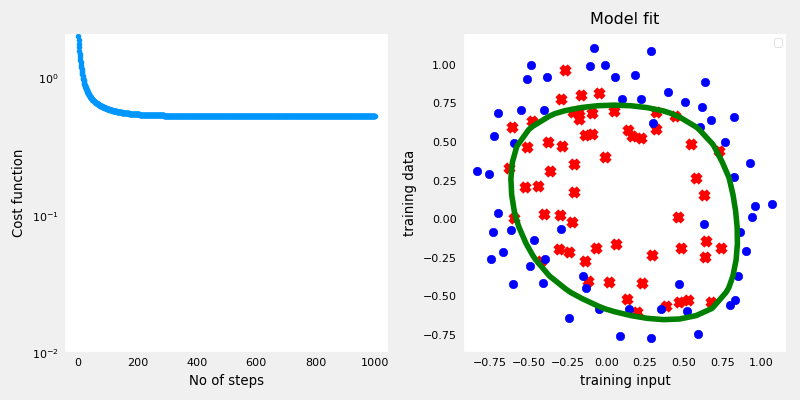

In [15]:
print(theta_f)

(array([ 0.62,  1.18, -2.02, -0.92, -1.43,  0.13, -0.37, -0.36, -0.17,
       -1.46, -0.05, -0.61, -0.27, -1.19, -0.24, -0.2 , -0.04, -0.27,
       -0.29, -0.46, -1.04,  0.03, -0.28,  0.02, -0.32, -0.14, -0.93]), 1.2715618096527268)


In [22]:
np.set_printoptions(precision=2)

In [55]:
meshd

[array([[-1.  , -0.89, -0.79, -0.68, -0.58, -0.47, -0.37, -0.26, -0.16,
         -0.05,  0.05,  0.16,  0.26,  0.37,  0.47,  0.58,  0.68,  0.79,
          0.89,  1.  ],
        [-1.  , -0.89, -0.79, -0.68, -0.58, -0.47, -0.37, -0.26, -0.16,
         -0.05,  0.05,  0.16,  0.26,  0.37,  0.47,  0.58,  0.68,  0.79,
          0.89,  1.  ],
        [-1.  , -0.89, -0.79, -0.68, -0.58, -0.47, -0.37, -0.26, -0.16,
         -0.05,  0.05,  0.16,  0.26,  0.37,  0.47,  0.58,  0.68,  0.79,
          0.89,  1.  ],
        [-1.  , -0.89, -0.79, -0.68, -0.58, -0.47, -0.37, -0.26, -0.16,
         -0.05,  0.05,  0.16,  0.26,  0.37,  0.47,  0.58,  0.68,  0.79,
          0.89,  1.  ],
        [-1.  , -0.89, -0.79, -0.68, -0.58, -0.47, -0.37, -0.26, -0.16,
         -0.05,  0.05,  0.16,  0.26,  0.37,  0.47,  0.58,  0.68,  0.79,
          0.89,  1.  ],
        [-1.  , -0.89, -0.79, -0.68, -0.58, -0.47, -0.37, -0.26, -0.16,
         -0.05,  0.05,  0.16,  0.26,  0.37,  0.47,  0.58,  0.68,  0.79,
          0.89, 

In [54]:
z_plot

array([[1.41e-04, 4.91e-04, 1.25e-03, 2.55e-03, 4.44e-03, 6.92e-03,
        9.93e-03, 1.34e-02, 1.71e-02, 2.09e-02, 2.46e-02, 2.76e-02,
        2.95e-02, 2.97e-02, 2.77e-02, 2.33e-02, 1.67e-02, 9.68e-03,
        4.09e-03, 1.11e-03],
       [6.82e-04, 2.28e-03, 5.60e-03, 1.11e-02, 1.89e-02, 2.88e-02,
        4.05e-02, 5.37e-02, 6.78e-02, 8.21e-02, 9.57e-02, 1.07e-01,
        1.16e-01, 1.18e-01, 1.13e-01, 9.90e-02, 7.52e-02, 4.64e-02,
        2.10e-02, 6.11e-03],
       [2.20e-03, 7.06e-03, 1.68e-02, 3.23e-02, 5.32e-02, 7.87e-02,
        1.08e-01, 1.39e-01, 1.71e-01, 2.02e-01, 2.30e-01, 2.55e-01,
        2.72e-01, 2.80e-01, 2.74e-01, 2.48e-01, 2.00e-01, 1.33e-01,
        6.56e-02, 2.05e-02],
       [5.27e-03, 1.64e-02, 3.76e-02, 6.96e-02, 1.11e-01, 1.57e-01,
        2.07e-01, 2.57e-01, 3.05e-01, 3.50e-01, 3.89e-01, 4.21e-01,
        4.45e-01, 4.56e-01, 4.50e-01, 4.20e-01, 3.58e-01, 2.59e-01,
        1.40e-01, 4.74e-02],
       [1.02e-02, 3.07e-02, 6.80e-02, 1.21e-01, 1.84e-01, 2.51e-01,
